# Tâche 8 : Analyse de la structure

In [48]:
from pymatgen.ext.matproj import MPRester
from pymatgen import Structure
from jupyter_jsmol.pymatgen import quick_view

from pymatgen.electronic_structure import bandstructure
from pymatgen.electronic_structure import plotter
from pymatgen.electronic_structure.plotter import BSPlotter
import numpy as np
import matplotlib.pyplot as plt

In [49]:
# Récupération de la structure
with MPRester("m4UKTJ8LxatvzyEV") as m:
    band_structure = m.get_bandstructure_by_material_id("mp-505297")

<module 'matplotlib.pyplot' from '/usr/local/lib64/python3.6/site-packages/matplotlib/pyplot.py'>

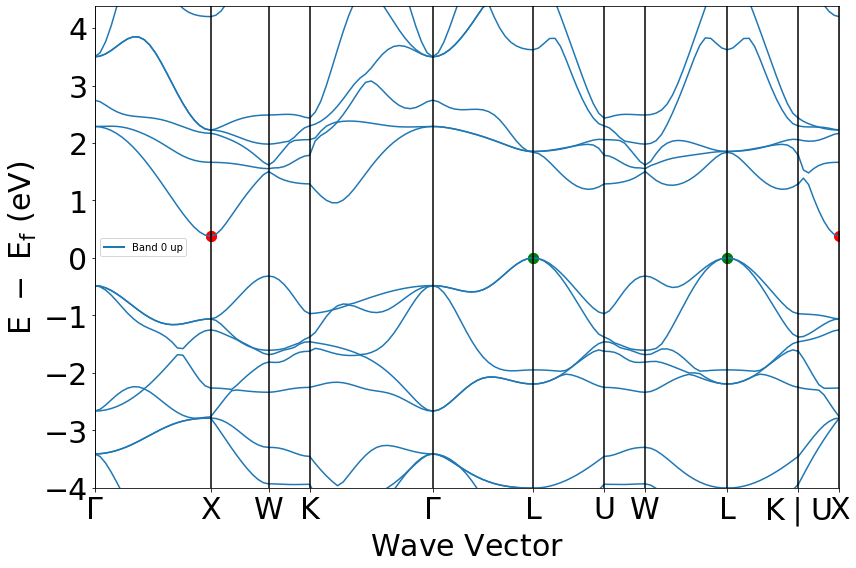

In [50]:
# Visualisation
plot = BSPlotter(band_structure)
plot.get_plot(vbm_cbm_marker=True)

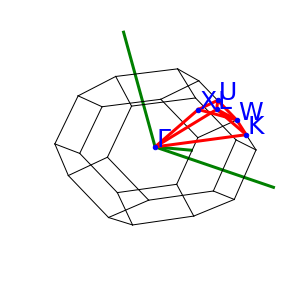

In [51]:
 BSPlotter(band_structure).plot_brillouin()

## Bande interdite

In [52]:
gap = band_structure.get_band_gap()
e_band = gap.get('energy')
print('Energie de la bande :', e_band, 'eV.')
if gap.get('direct') == False:
    print('La bande interdite est indirect.')
else:
    print('La bande interdite est direct.')

print('La bande interdite se situe entre 0 eV et {} eV.'.format(e_band))
print("Vecteur de transition :", gap['transition'])

Energie de la bande : 0.37729999999999997 eV.
La bande interdite est indirect.
La bande interdite se situe entre 0 eV et 0.37729999999999997 eV.
Vecteur de transition : L-X


### Analyse
La bande interdite correspond à toute une bande de valeurs énergétiques dont les niveaux ne peuvent être occupés par les électrons du cristal. 


Le gap est assez petit (<1 eV): on est donc dans le cas d'un matériau conducteur. Le site de Materials Project nous donne quant à lui un gap de 0.623 eV. Cette valeur est largement supérieure à celle obtenue mais, selon Materials Project, les bandes interdites calculées sont souvent sous-estimées de près de 50% (ce qui est bien notre cas). On reste dans une valeur en dessous de 1 eV dans tous les cas donc notre conclusion d'avoir un matériaux conducteur reste valable. 



On est bien dans le cas d'une bande interdite indirecte; on peut facilement voir sur le graphique des bandes électroniques que les extremums des bandes de conduction (points rouges) et de valence (points verts) ne correspondent pas au même quasi-moment. La transition se fait du kpoint L au kpoint X.

## Dispersion

La dispersion est un phénomène apparaissant dans un milieu dispersif: les différentes fréquences de l'onde ne vont plus se propager à la même vitesse. Ce phénomène dépend donc de la variation d'énergie du vecteur d'onde k. On va donc déterminer les pentes maximales et minimales repsectivement de chaque branche pour ces bandes. Une pente maximale correspondra à un maximum de dispersion et inversément.

### Dernière bande de valence

In [53]:
data = plotter.BSPlotter(band_structure).bs_plot_data()
x = data.get('ticks').get('distance')
x = np.array([x[0], x[1], x[3], x[5], x[7], x[9], x[11], x[13], x[15], x[17], x[18]])
y = data.get('energy')

# Determine l'énergie 0
E_0 = data.get('zero_energy')
print("Energie 0 = {} eV".format(E_0))

# Determine la dernière bande de valence
vbm = band_structure.get_vbm()
E_vbm = vbm['energy']
kpoint_vbm = vbm['kpoint'].cart_coords

print('Energie du maximum de la bande de valence = {} eV'.format(E_vbm))
print('sur le graphe : E-Ef = ', (E_vbm-E_0))
print('Vecteur k  en coordonnées cartésiennes =', kpoint_vbm)
print(vbm.get('band_index'))

Energie 0 = 6.9534 eV
Energie du maximum de la bande de valence = 6.9534 eV
sur le graphe : E-Ef =  0.0
Vecteur k  en coordonnées cartésiennes = [0.50653464 0.50653464 0.50653464]
defaultdict(<class 'list'>, {<Spin.up: 1>: [13, 14]})


#### Analyse
Les bandes 13 et 14 contiennent la plus grande énergie de la bande de valence. Ces deux extremums correspondent aux points verts sur le diagramme de bandes. 


### Première bande de conduction

In [54]:
cbm = band_structure.get_cbm()
E_cbm = cbm['energy']
kpoint_cbm = cbm['kpoint'].cart_coords

print('Energie du minimum de la bande de conduction = ',E_cbm,'eV')
print('sur le graphe : E-Ef = ', (E_cbm-E_0))
print('Vecteur k (coordonnées cartésiennes) =',kpoint_cbm)
print(cbm.get('band_index'))

Energie du minimum de la bande de conduction =  7.3307 eV
sur le graphe : E-Ef =  0.37729999999999997
Vecteur k (coordonnées cartésiennes) = [ 0.00000000e+00  1.01306927e+00 -1.11022302e-16]
defaultdict(<class 'list'>, {<Spin.up: 1>: [15]})


#### Analyse
La 15ème bande contient la plus basse énergie de la bande de conduction (correspondant au point rouge du diagramme de bande). 


Regardons à présent les pentes de nos deux bandes pour déterminer là où il y a le plus et le moins de dispersion. 

In [55]:
dx = np.zeros(10)
dyc = np.zeros(10)
dyv = np.zeros(10)
mc = np.zeros(10)
mv = np.zeros(10)

for i in range(10):
    dx[i] = x[i+1] - x[i]
    
for i in range(10):
    dyv[i] =y.get('1')[i][14][-1] - y.get('1')[i][14][0]
    dyc[i] =y.get('1')[i][15][-1] - y.get('1')[i][15][0]
    
for i in range (10):
    mc[i] = dyc[i]/dx[i]
    mv[i] = dyv[i]/dx[i] 
    

print("En valeur absolue:")
mxV = np.max(abs(mv))
print("Plus grande dispersion pour la bande de valence: ", mxV)
mxC = np.max(abs(mc))
print("Plus grande dispersion pour la bande de conduction: ", mxC)
mnV = np.min(abs(mv))
print("Plus faible dispersion pour la bande de valence: ", mnV)
mnC = np.min(abs(mc))
print("Plus faible dispersion pour la bande de conduction: ", mnC)

En valeur absolue:
Plus grande dispersion pour la bande de valence:  1.831511666920709
Plus grande dispersion pour la bande de conduction:  2.5420600194074714
Plus faible dispersion pour la bande de valence:  0.2529496296082543
Plus faible dispersion pour la bande de conduction:  0.4680684923159416


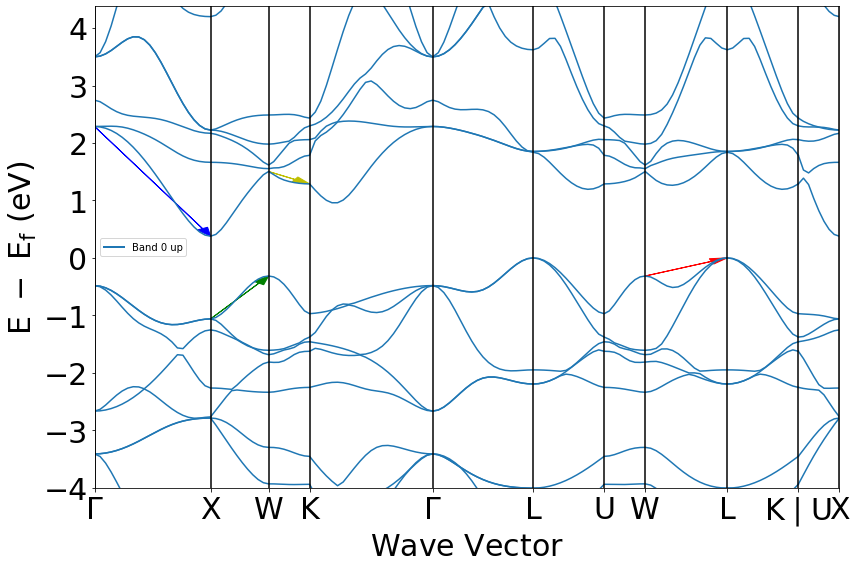

In [56]:
BSPlotter(band_structure).get_plot()
plt.arrow(x[7], (y.get('1')[7][14])[0], dx[7], dyv[7], color = 'r', head_width = 0.1,length_includes_head=True)
plt.arrow(x[1], (y.get('1')[1][14])[0], dx[1], dyv[1], color = 'g', head_width = 0.1,length_includes_head=True)
plt.arrow(x[0], (y.get('1')[0][15])[0], dx[0], dyc[0], color = 'b', head_width = 0.1,length_includes_head=True)
plt.arrow(x[2], (y.get('1')[2][15])[0], dx[2], dyc[2], color = 'y', head_width = 0.1,length_includes_head=True)

plt.show()

#### Dispertion sur la dernière bande de valence
La plus grande dispertion pour la dernière bande de valence a lieu sur: Gamma-X.
Elle vaut 1.83 et est représentée en bleu. 


La plus faible dispertion pour la dernière bande de valence a lieu sur: W-K.
Elle vaut 0.25 et est représentée par une flèche jaune.


#### Dispertion sur la première bande de conduction
La plus grande dispertion pour la première bande de conduction a lieu sur: X-W.
Elle vaut 2.54 et est représentée en vert. 


La plus faible dispertion pour la dernière bande de valence a lieu sur: W-L.
Elle vaut 0.47 et est représentée par une flèche rouge.


Mais il doit y avoir une erreur puisque les valeurs ne correspondent pas tout à fait au pente observée. 

## Masse effective au sommet de la dernière bande de valence
Pour cette dernière partie, nous allons tout d'abord supposer une dispersion parabolique. On peut alors avoir la formule suivante pour déterminer la masse effective:


$$m^* = \frac{\hbar^2 k^2}{2\cdot E(k)} = \frac{\hbar^2 (k_x^2 + k_y^2 + k_z^2)}{2\cdot E(k)}$$



E(k) est l'énergie d'un électron de vecteur d'onde k (3 dimensions) dans la bande considérée.
$\hbar = \frac{h}{2\pi}$ avec $h$ la constante de Planck et vaut $1.38064852e(-23)$ J/K $= 4.1357e(-15)$ eV s.


Cette formule n'est utilisable sous cette forme que si la norme du vecteur d'onde est non-nul. Une rapide vérification nous permet de voir que c'est bien le cas pour notre bande de conduction et de valence. 

In [57]:
kpoint_val = band_structure.get_vbm().get('kpoint').frac_coords
norm_k_val = np.linalg.norm(kpoint_val)
print('Pour la bande de valence, la valeur de la norme est {}'.format(norm_k_val))

kpoint_con = band_structure.get_cbm().get('kpoint').frac_coords
norm_k_con = np.linalg.norm(kpoint_con)

print('Pour la bande de conduction, la valeur de la norme est {}'.format(norm_k_con))

Pour la bande de valence, la valeur de la norme est 0.8660254037844386
Pour la bande de conduction, la valeur de la norme est 0.7071067811865476


In [58]:
h_bar = 6.5821e-16
m_electron = 9.11e-31

m_vbm = (h_bar**2 * (kpoint_vbm[0]**2+kpoint_vbm[1]**2+kpoint_vbm[2]**2))/(2*abs(E_vbm))
print('La masse effective au sommet de la dernière bande de valence = {} kg.'.format(m_vbm))

La masse effective au sommet de la dernière bande de valence = 2.3979564608440126e-32 kg.


## Masse effective à la base de la première bande de conduction


In [59]:
m_cbm = (h_bar**2 * (kpoint_cbm[0]**2+kpoint_cbm[1]**2+kpoint_cbm[2]**2))/(2*E_cbm)
print('La masse effective à la base de la première bande de conduction = {} kg.'.format(m_cbm))

La masse effective à la base de la première bande de conduction = 3.03271637630472e-32 kg.
